Necessary Libraris were imported

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Breast cancer dataset downloaded was very large with 160000 entries and 2800 columns hence importing the whole dataset at once was a bit time consuming!
so it was imported as chunks of 10000 entries each and then concatenated to make the process fast and hazzle free

In [2]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\merged_padelpy_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.


Few incorrect and inconsistent values such as negatives and infinite values were identified in the dataset and were processed accordingly.

In [84]:
import pandas as pd

# Assuming you have a DataFrame named 'concatenated_df'
negative_ic50_mask = concatenated_df['Library IC50'] < 0
concatenated_df.loc[negative_ic50_mask, 'Library IC50'] = -concatenated_df.loc[negative_ic50_mask, 'Library IC50']


In [85]:
has_negative_values = (concatenated_df['Library IC50']<0).any()
if has_negative_values:
    print('presence')
else:
    print('absent')

absent


In [87]:
concatenated_df.columns.tolist()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Library IC50',
 'Combo IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',


Categorical data encoding was done!


In [88]:
from MultiColumnLabelEncoder import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder()
df = Mcle.fit_transform(concatenated_df)
df

In [90]:
original_data = df.copy()

Dependent and independent variables - Biological activity and molecular descriptors respectively were seperated and made them ready for ML based model training.

In [91]:
#INDEPENDENT ATTRIBUTES
X = df.drop('Library IC50', axis = 1)
X

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,0,0,0,0,0,0,0,0.25000,0,0,...,200.540557,491.798498,14.141762,200.540557,49.263751,918.809671,650.280663,30.411126,313.957952,5.424050
1,1,1,0,0,1,1,1,0.00025,1,1,...,235.929242,495.517260,15.839972,235.929242,52.699492,919.724409,656.503064,30.375314,353.089897,5.847010
2,2,2,0,0,2,2,2,10.00000,2,2,...,167.463013,485.886555,15.454071,167.463013,48.526990,834.594744,562.029377,29.342802,281.217665,4.901308
3,3,3,0,0,3,3,0,2.50000,3,3,...,224.593531,493.237488,14.593571,224.593531,50.595364,959.529591,675.772023,31.365207,367.583065,5.573865
4,4,4,0,0,4,4,3,0.62500,4,4,...,178.310056,473.819605,14.871784,178.310056,50.503722,904.256139,627.653184,29.590188,305.014273,5.264898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,32,32,0,0,19,19,10,2.50000,39,36,...,178.125094,483.713268,13.648716,178.125094,48.981347,856.785019,558.411682,29.080936,316.854658,4.640307
153608,14,14,0,0,5,5,4,2.00000,37,35,...,231.484130,476.229825,13.709655,231.484130,56.537798,1039.054406,767.633551,32.516187,370.086350,5.881938
153609,36,36,0,0,8,8,7,2.50000,29,28,...,278.898124,526.511035,11.360753,278.898124,55.352802,866.291504,751.130750,36.065517,366.023527,4.791210
153610,5,5,0,0,6,6,5,10.00000,10,10,...,304.374607,554.372817,9.718701,304.374607,0.000000,538.402068,578.287232,40.052447,573.483382,3.048730


In [92]:
#DEPENDENT ATTRIBUTES
Y = df['Library IC50']
Y = pd.DataFrame(Y)
Y

,Library IC50
0,17.710236
1,6.045908
2,1.190284
3,14.550839
4,8.548526
...,...
153607,6.781239
153608,9.535721
153609,14.236143
153610,12.924242


OUTLIER HANDLING!!!

Outlier handling was verry important and can make value bias and create inconsistensies while training the model
KURTOSIS and SKEWNESS values were identified and based on the initial values transformatins were done accordingly to reduce the outliers and clean the data.

Text(0.5, 1.0, 'skewness distribution')

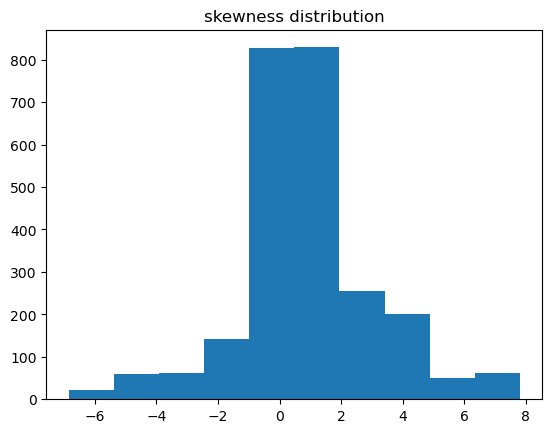

In [93]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

   # Assuming you have your dataset in a variable 'data' with 160000 rows and 2517 columns

  # Calculate skewness for each column
skewness_values = np.apply_along_axis(skew, axis=0, arr=X)
plt.hist(x = skewness_values)
plt.title('skewness distribution')

Text(0.5, 1.0, 'kurtosis distribution')

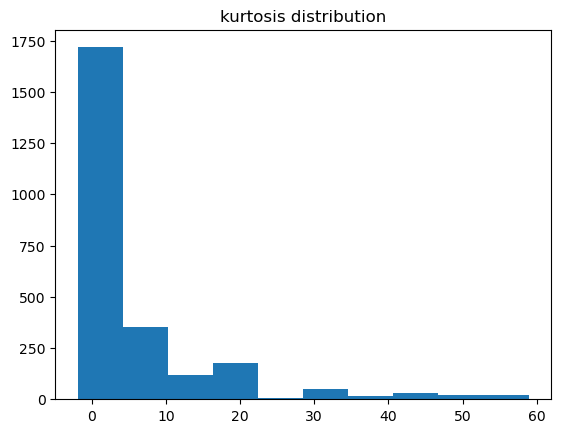

In [63]:
# Calculate kurtosis for each column
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=X)
plt.hist(x = kurtosis_values)
plt.title('kurtosis distribution')

# Now, skewness_values and kurtosis_values contain the skewness and kurtosis values for each column, respectively.


In [94]:
import numpy as np
from scipy.stats import kurtosis, boxcox, yeojohnson
from sklearn.preprocessing import StandardScaler

# Assuming you have your dataset in a variable 'data' with 160000 rows and 2517 columns

# Calculate kurtosis for each column
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=X)

# Define a threshold for kurtosis to identify columns with anomalies
kurtosis_threshold = 3  # Normal distribution has kurtosis = 3

# Initialize lists to keep track of columns to transform
columns_to_boxcox = []
columns_to_yeojohnson = []
columns_to_sqrt = []
columns_to_log = []

# Iterate through kurtosis values and apply transformations
for i, kurt in enumerate(kurtosis_values):
    if kurt > kurtosis_threshold:
        # If kurtosis is greater than the threshold (leptokurtic), apply Box-Cox or Yeo-Johnson transformations
        try:
            transformed_column, _ = boxcox(X.iloc[:, i] + 1)  # Adding 1 to avoid issues with zero or negative values
            X.iloc[:, i] = transformed_column
            columns_to_boxcox.append(i)
        except ValueError:
            # Box-Cox may not work for all distributions, so we handle exceptions
            transformed_column, _ = yeojohnson(X.iloc[:, i] + 1)  # Yeo-Johnson transformation
            X.iloc[:, i] = transformed_column
            columns_to_yeojohnson.append(i)
    elif kurt < kurtosis_threshold:
        # If kurtosis is less than the threshold (platykurtic), apply sqrt or log transformations
        if np.min(X.iloc[:, i]) >= 0:
            transformed_column = np.sqrt(X.iloc[:, i])
            X.iloc[:, i] = transformed_column
            columns_to_sqrt.append(i)
        else:
            # Log transformation is not applicable to negative values
            transformed_column = np.log(X.iloc[:, i] - np.min(X.iloc[:, i]) + 1)  # Adding 1 to avoid issues with zero or negative values
            X.iloc[:, i] = transformed_column
            columns_to_log.append(i)




C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [95]:
X_duplicate = X.copy()
X_duplicate

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.207784,0.000000,0.000000,...,14.161234,22.176530,3.760553,14.161234,1.097540e+06,30.311873,25.500601,0.169104,17.718859,2.328959
1,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,0.000250,1.000000,1.000000,...,15.359988,22.260217,3.979946,15.359988,1.420196e+06,30.326958,25.622316,0.169104,18.790686,2.418059
2,1.414214,1.414214,0,0,1.414214,1.414214,1.414214,1.218032,1.414214,1.414214,...,12.940750,22.042835,3.931167,12.940750,1.036152e+06,28.889353,23.707159,0.169104,16.769546,2.213890
3,1.732051,1.732051,0,0,1.732051,1.732051,0.000000,0.858400,1.732051,1.732051,...,14.986445,22.208951,3.820153,14.986445,1.215300e+06,30.976275,25.995615,0.169104,19.172456,2.360903
4,2.000000,2.000000,0,0,2.000000,2.000000,1.732051,0.416649,2.000000,2.000000,...,13.353279,21.767398,3.856395,13.353279,1.206908e+06,30.070852,25.053007,0.169104,17.464658,2.294537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,5.656854,5.656854,0,0,4.358899,4.358899,3.162278,0.858400,6.244998,6.000000,...,13.346351,21.993482,3.694417,13.346351,1.073699e+06,29.270890,23.630736,0.169104,17.800412,2.154137
153608,3.741657,3.741657,0,0,2.236068,2.236068,2.000000,0.786327,6.082763,5.916080,...,15.214603,21.822691,3.702655,15.214603,1.858737e+06,32.234367,27.706201,0.169104,19.237629,2.425271
153609,6.000000,6.000000,0,0,2.828427,2.828427,2.645751,0.858400,5.385165,5.291503,...,16.700243,22.945828,3.370572,16.700243,1.713919e+06,29.432830,27.406765,0.169104,19.131741,2.188883
153610,2.236068,2.236068,0,0,2.449490,2.449490,2.236068,1.218032,3.162278,3.162278,...,17.446335,23.545123,3.117483,17.446335,0.000000e+00,23.203493,24.047603,0.169104,23.947513,1.746061


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1203: RuntimeWarning: overflow encountered in square
  s = s**2


Text(0.5, 1.0, 'transformed kurtosis distribution')

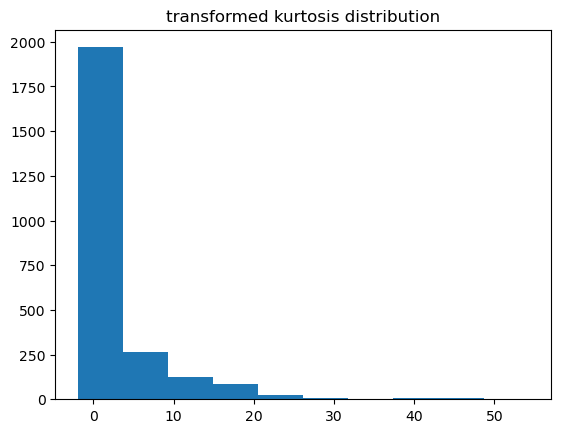

In [96]:
# Calculate kurtosis for each column
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=X)
import matplotlib.pyplot as plt
plt.hist(x = kurtosis_values)
plt.title('transformed kurtosis distribution')

C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1205: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Text(0.5, 1.0, 'transformation(kurtosis) skewness distribution')

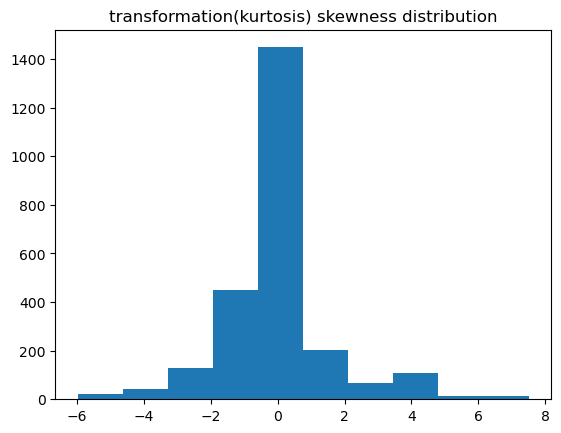

In [97]:
# Calculate skewness for each column
skewness_values = np.apply_along_axis(skew, axis=0, arr=X)
import matplotlib.pyplot as plt
plt.hist(x = skewness_values)
plt.title('transformation(kurtosis) skewness distribution')

STANDARDIZATION WAS DONE AFTER HANDLING OUTLIERS TO SCALE DOWN ALL THE VALUES INTO SAME RANGE TO AVOID BIAS

In [98]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std

,0,1,2,3,4,5,6,7,8,9,...,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515
0,-2.315904,-2.315904,0.0,0.0,-2.542733,-2.542733,-2.172609,-0.805546,-2.705830,-2.787943,...,-0.565109,-0.077166,-0.297072,-0.565109,-0.639410,-0.223286,-0.261468,-0.427673,-0.624512,-0.116656
1,-1.771624,-1.771624,0.0,0.0,-1.737101,-1.737101,-1.199754,-1.304740,-2.128216,-2.168169,...,0.339178,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047
2,-1.546177,-1.546177,0.0,0.0,-1.403398,-1.403398,-0.796785,1.624465,-1.888960,-1.911450,...,-1.485789,-0.441956,0.614692,-1.485789,-0.837328,-0.838534,-1.379027,-1.316998,-1.082054,-0.740047
3,-1.373184,-1.373184,0.0,0.0,-1.147338,-1.147338,-2.172609,0.759422,-1.705373,-1.714462,...,0.057394,0.011293,0.021432,0.057394,-0.259744,0.064071,0.046993,0.207496,0.076081,0.056404
4,-1.227345,-1.227345,0.0,0.0,-0.931470,-0.931470,-0.487575,-0.303149,-1.550602,-1.548394,...,-1.174595,-1.193487,0.215110,-1.174595,-0.286801,-0.327529,-0.540380,-1.091681,-0.747030,-0.303140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,0.763004,0.763004,0.0,0.0,0.968934,0.968934,0.903828,0.759422,0.901369,0.930704,...,-1.179821,-0.576614,-0.650509,-1.179821,-0.716275,-0.673517,-1.426649,-1.569757,-0.585206,-1.063759
153608,-0.279397,-0.279397,0.0,0.0,-0.741286,-0.741286,-0.226899,0.586058,0.807659,0.878693,...,0.229506,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116
153609,0.949772,0.949772,0.0,0.0,-0.264063,-0.264063,0.401323,0.759422,0.404717,0.491596,...,1.350208,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521
153610,-1.098858,-1.098858,0.0,0.0,-0.569346,-0.569346,0.002760,1.624465,-0.879254,-0.828044,...,1.913026,3.657047,-3.733669,1.913026,-4.177947,-3.297701,-1.166884,2.684624,2.377525,-3.274524


In [71]:
# Assuming 'df' is your original DataFrame and 'encoded_df_std' is your standardized DataFrame

# Create a dictionary mapping new column names to old column names
column_name_mapping = {
    new_column: old_column
    for new_column, old_column in zip(X_std.columns, X_duplicate.columns)
}

# Rename the columns in the standardized DataFra
X_std.rename(columns=column_name_mapping, inplace=True)

# Print the modified DataFrame to verify the chang
X_std

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,-2.315904,-2.315904,0.0,0.0,-2.542733,-2.542733,-2.172609,-0.805546,-2.705830,-2.787943,...,-0.565109,-0.077166,-0.297072,-0.565109,-0.639410,-0.223286,-0.261468,-0.427673,-0.624512,-0.116656
1,-1.771624,-1.771624,0.0,0.0,-1.737101,-1.737101,-1.199754,-1.304740,-2.128216,-2.168169,...,0.339178,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047
2,-1.546177,-1.546177,0.0,0.0,-1.403398,-1.403398,-0.796785,1.624465,-1.888960,-1.911450,...,-1.485789,-0.441956,0.614692,-1.485789,-0.837328,-0.838534,-1.379027,-1.316998,-1.082054,-0.740047
3,-1.373184,-1.373184,0.0,0.0,-1.147338,-1.147338,-2.172609,0.759422,-1.705373,-1.714462,...,0.057394,0.011293,0.021432,0.057394,-0.259744,0.064071,0.046993,0.207496,0.076081,0.056404
4,-1.227345,-1.227345,0.0,0.0,-0.931470,-0.931470,-0.487575,-0.303149,-1.550602,-1.548394,...,-1.174595,-1.193487,0.215110,-1.174595,-0.286801,-0.327529,-0.540380,-1.091681,-0.747030,-0.303140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,0.763004,0.763004,0.0,0.0,0.968934,0.968934,0.903828,0.759422,0.901369,0.930704,...,-1.179821,-0.576614,-0.650509,-1.179821,-0.716275,-0.673517,-1.426649,-1.569757,-0.585206,-1.063759
153608,-0.279397,-0.279397,0.0,0.0,-0.741286,-0.741286,-0.226899,0.586058,0.807659,0.878693,...,0.229506,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116
153609,0.949772,0.949772,0.0,0.0,-0.264063,-0.264063,0.401323,0.759422,0.404717,0.491596,...,1.350208,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521
153610,-1.098858,-1.098858,0.0,0.0,-0.569346,-0.569346,0.002760,1.624465,-0.879254,-0.828044,...,1.913026,3.657047,-3.733669,1.913026,-4.177947,-3.297701,-1.166884,2.684624,2.377525,-3.274524


ONCE AFTER PREPROCESSING THE INDEPENDENT VARIABLES DATA (X), IT WAS CONCATENATED WITH 'Y' (DEPENDENT VARIABLE)

In [100]:
data = pd.concat([X_std, Y], axis = 1)
data

,0,1,2,3,4,5,6,7,8,9,...,2507,2508,2509,2510,2511,2512,2513,2514,2515,Library IC50
0,-2.315904,-2.315904,0.0,0.0,-2.542733,-2.542733,-2.172609,-0.805546,-2.705830,-2.787943,...,-0.077166,-0.297072,-0.565109,-0.639410,-0.223286,-0.261468,-0.427673,-0.624512,-0.116656,17.710236
1,-1.771624,-1.771624,0.0,0.0,-1.737101,-1.737101,-1.199754,-1.304740,-2.128216,-2.168169,...,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047,6.045908
2,-1.546177,-1.546177,0.0,0.0,-1.403398,-1.403398,-0.796785,1.624465,-1.888960,-1.911450,...,-0.441956,0.614692,-1.485789,-0.837328,-0.838534,-1.379027,-1.316998,-1.082054,-0.740047,1.190284
3,-1.373184,-1.373184,0.0,0.0,-1.147338,-1.147338,-2.172609,0.759422,-1.705373,-1.714462,...,0.011293,0.021432,0.057394,-0.259744,0.064071,0.046993,0.207496,0.076081,0.056404,14.550839
4,-1.227345,-1.227345,0.0,0.0,-0.931470,-0.931470,-0.487575,-0.303149,-1.550602,-1.548394,...,-1.193487,0.215110,-1.174595,-0.286801,-0.327529,-0.540380,-1.091681,-0.747030,-0.303140,8.548526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,0.763004,0.763004,0.0,0.0,0.968934,0.968934,0.903828,0.759422,0.901369,0.930704,...,-0.576614,-0.650509,-1.179821,-0.716275,-0.673517,-1.426649,-1.569757,-0.585206,-1.063759,6.781239
153608,-0.279397,-0.279397,0.0,0.0,-0.741286,-0.741286,-0.226899,0.586058,0.807659,0.878693,...,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116,9.535721
153609,0.949772,0.949772,0.0,0.0,-0.264063,-0.264063,0.401323,0.759422,0.404717,0.491596,...,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521,14.236143
153610,-1.098858,-1.098858,0.0,0.0,-0.569346,-0.569346,0.002760,1.624465,-0.879254,-0.828044,...,3.657047,-3.733669,1.913026,-4.177947,-3.297701,-1.166884,2.684624,2.377525,-3.274524,12.924242


the transformed data was again saved to PC for further usage as chuks of 10000 entries each! in random

In [101]:
#exporting chunks of data in random
import pandas as pd
import numpy as np  # Import NumPy for random shuffling

# Assuming your DataFrame is named 'df'
chunk_size = 10000  # Set your desired chunk size

# Shuffle the DataFrame randomly
df_shuffled = data.sample(frac=1, random_state=1059)  # You can change the random_state for different shuffling

# Calculate the number of chunks needed
num_chunks = len(df_shuffled) // chunk_size + 1

# Define a directory where you want to save the chunks
output_directory = 'D:\Library_IC50_skew_kurt_data'

# Create the output directory if it doesn't exist
import os
os.makedirs(output_directory, exist_ok=True)

# Split the shuffled DataFrame into chunks and save each chunk to a separate CSV file
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk_df = df_shuffled.iloc[start_idx:end_idx]
    chunk_filename = f'chunk_{i}.csv'
    chunk_path = os.path.join(output_directory, chunk_filename)
    chunk_df.to_csv(chunk_path, index=False)

# To load a specific chunk back into memory, you can use pd.read_csv()
# For example, to load the first chunk:
chunk_0 = pd.read_csv(os.path.join(output_directory, 'chunk_0.csv'))


the transformed data was again saved to PC for further usage as chuks of 10000 entries each! in sequence

In [ ]:
#below code was to take chunks of the data in order and not in random
import pandas as pd

# Assuming your DataFrame is named 'df'
chunk_size = 10000  # Set your desired chunk size

# Calculate the number of chunks needed
num_chunks = len(df_std) // chunk_size + 1

# Define a directory where you want to save the chunks
output_directory = 'D:\kurt_skew_data'

# Create the output directory if it doesn't exist
import os
os.makedirs(output_directory, exist_ok=True)

# Split the DataFrame into chunks and save each chunk to a separate CSV file
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk_df = df.iloc[start_idx:end_idx]
    chunk_filename = f'chunk_{i}.csv'
    chunk_path = os.path.join(output_directory, chunk_filename)
    chunk_df.to_csv(chunk_path, index=False)

# To load a specific chunk back into memory, you can use pd.read_csv()
# For example, to load the first chunk:
chunk_0 = pd.read_csv(os.path.join(output_directory, 'chunk_0.csv'))